In [1]:
from Model.DCVAE import DCVAE,DCVAE_Norm,DCVAE_NormV2
from Model.Utils import LoadMPS100,PlotHistory,PlotDataAE,Save_Model
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np

/root/miniconda3/envs/tensorflow35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_train1,x_test1=LoadMPS100(dirBase='DataSet/MPS-100.mat',AllTrain=True);
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)

In [3]:
model = DCVAE(input_shape=(100, 100, 2),filters=[32,32,16],strides=[2,2,1],hidden_dim=5000,
               KernelDim=(3,3,3),latent_dim=200,opt=RMSprop(lr=0.001),dropout=0.1)

In [4]:
model.fit(x_train, num_epochs=1000,batch_size=64,val_split=0.2,verbose=0)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 50, 32)   608         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 25, 25, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 25, 25, 16)   4624        conv2d_2[0][0]                   
_________________________________________________________________________________________


Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.



Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.00016000001050997525.



Epoch 00052: ReduceLROnPlateau reducing learning rate to 8.000000525498763e-05.



val_loss   :  [1710.487501953125, 1714.6050615234376, 1712.3914365234375, 1716.0443330078126]
loss   :  [1346.3737885742187, 1340.6743955078125, 1337.0613957519531, 1334.2562470703126]


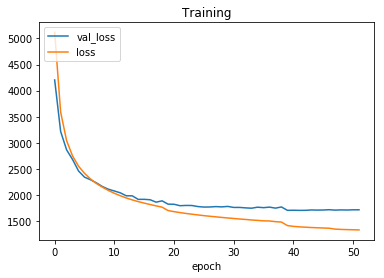

In [5]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

lr   :  [0.00016000001, 0.00016000001, 0.00016000001, 0.00016000001]


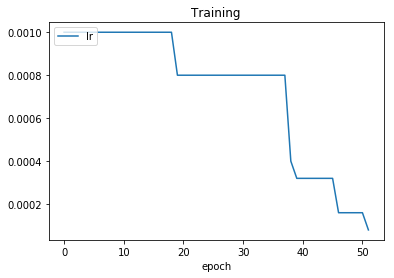

In [6]:
PlotHistory(model.history.history,listKeys=['lr'])

val_acc_pred   :  [0.9391317877769471, 0.9391734881401061, 0.9390874629020691, 0.9390648355484009]
acc_pred   :  [0.9529756113290787, 0.9532286124229431, 0.9533914042711258, 0.9535059937238693]


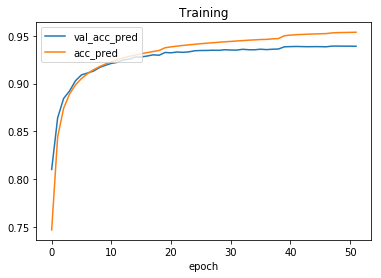

In [7]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

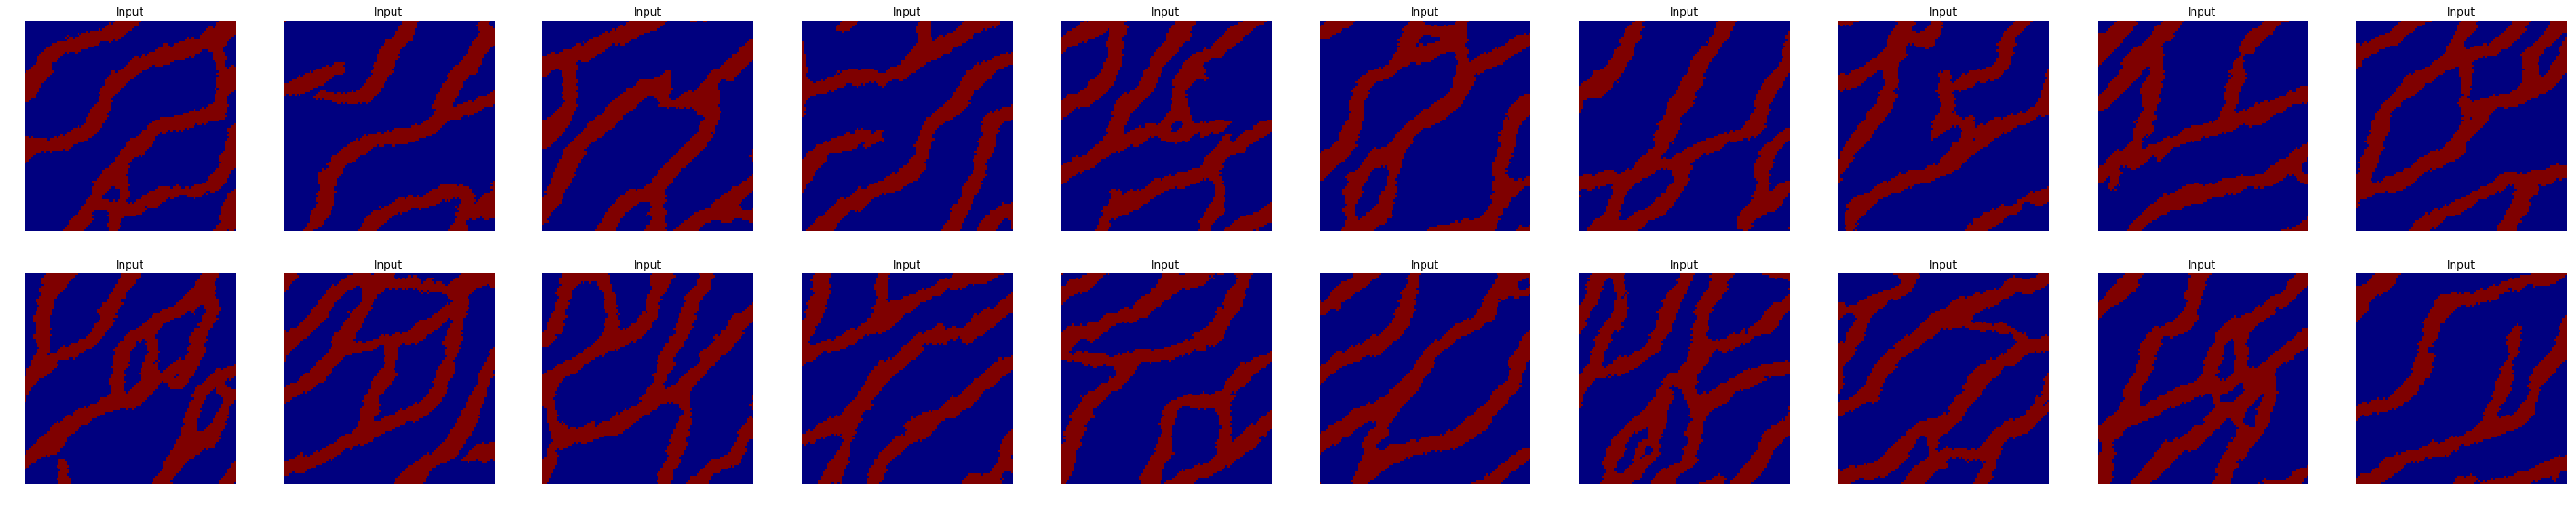

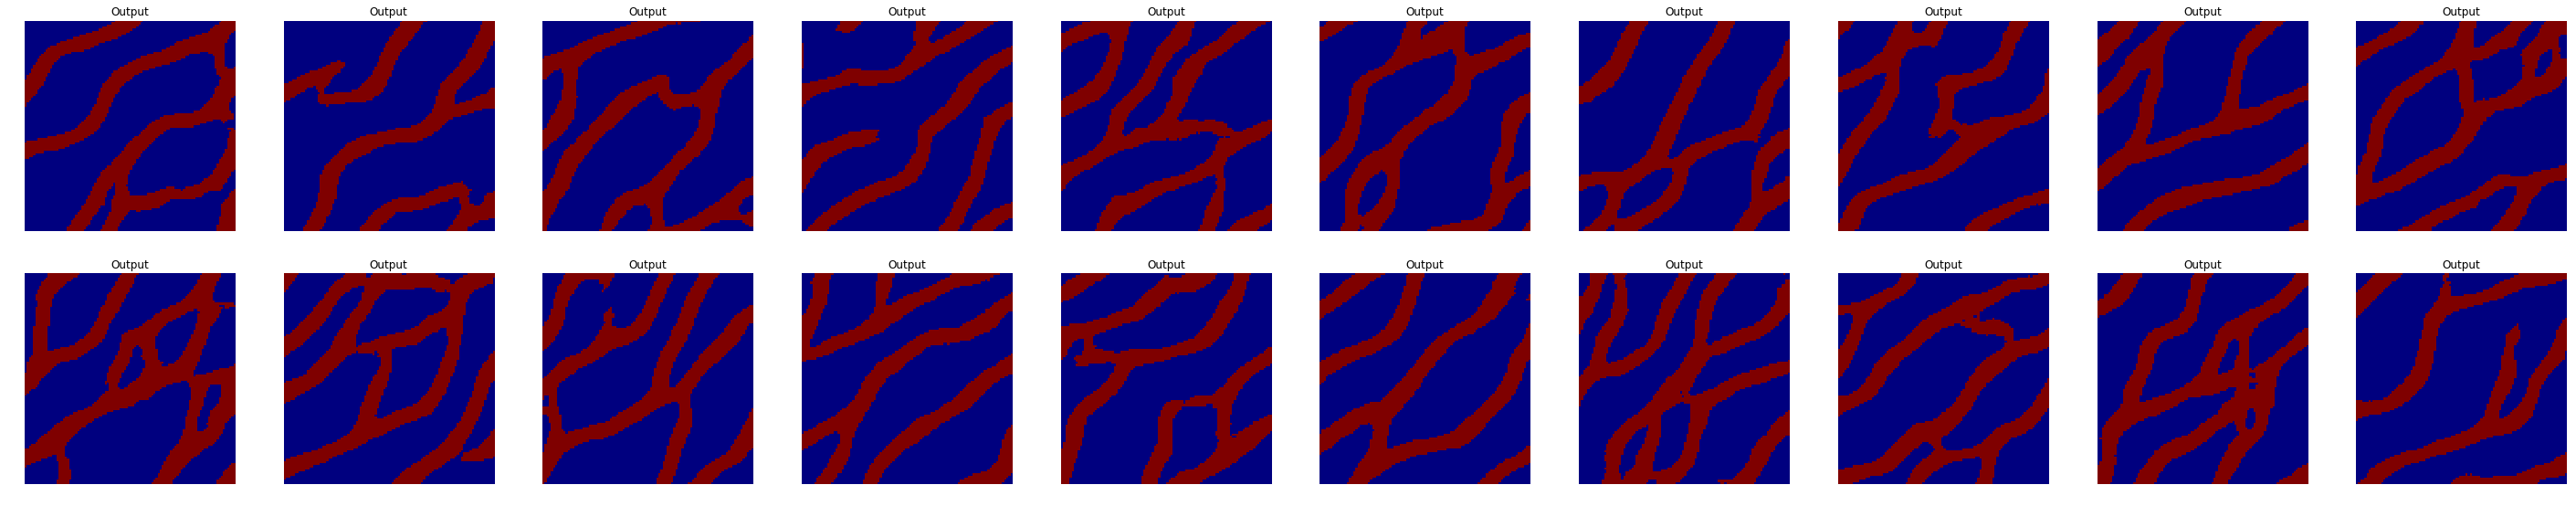

In [8]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=100)

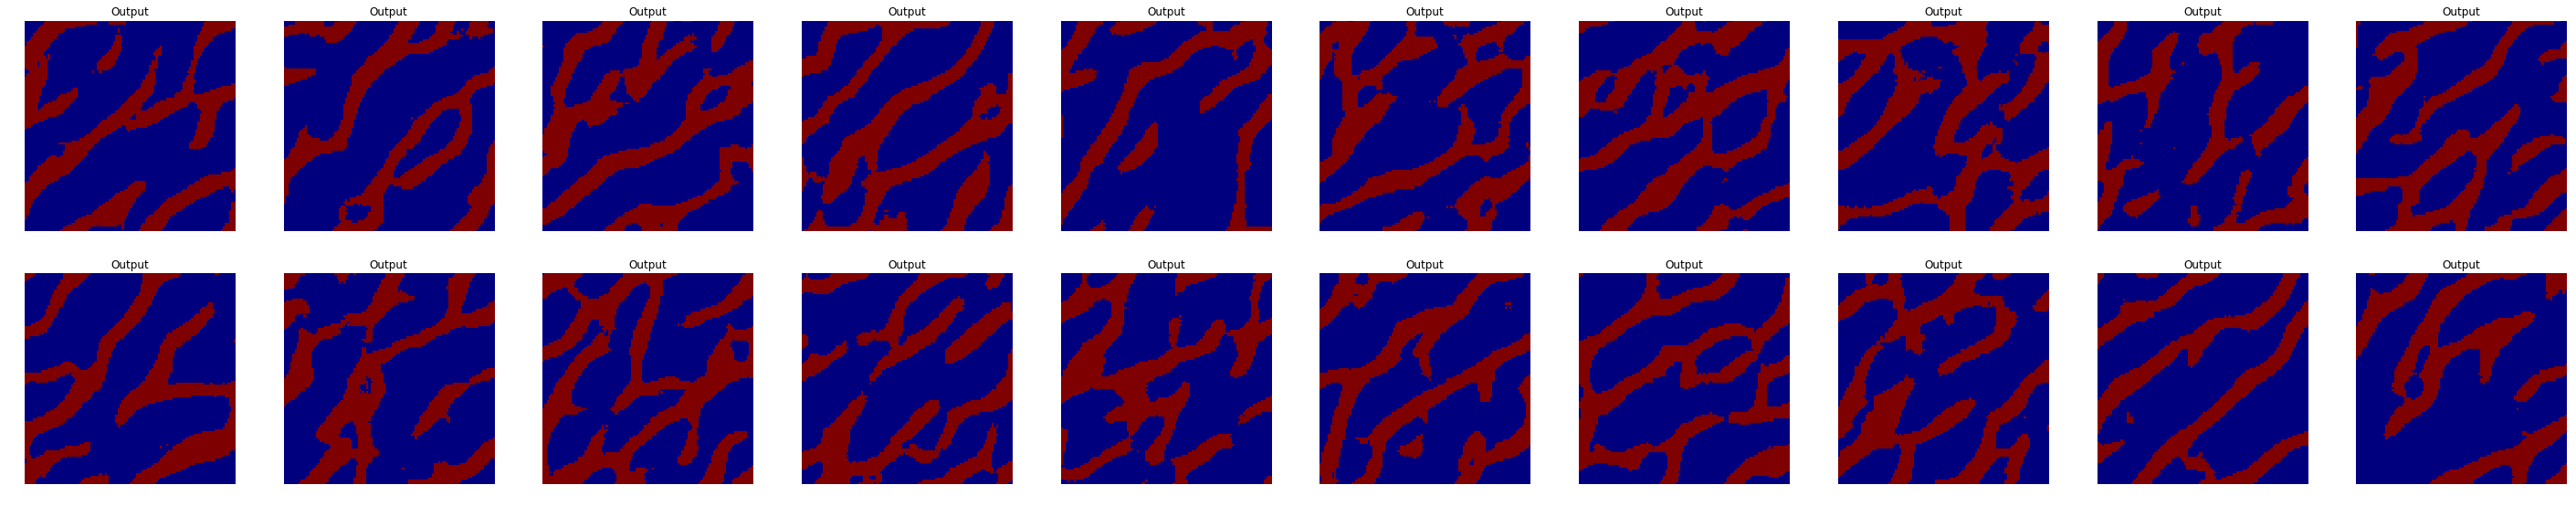

In [9]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=100,Only_Result=False)